# Spaceship Titanic

Train dataframe description:
- **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
- **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- **Destination** - The planet the passenger will be debarking to.
- **Age** - The age of the passenger.
- **VIP** - Whether the passenger has paid for special VIP service during the voyage.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **Name** - The first and last names of the passenger.
- **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
# Some modules that we are going to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Define Train and Test dataframe

In [2]:
# Define train and test dataframe.
train_df = pd.read_csv("../inputdata/train.csv", sep=",")
test_df = pd.read_csv("../inputdata/test.csv", sep=",")

print("Train_df shape:", train_df.shape)
print(train_df.describe())

print("\n\nFirst 10 samples:")
print(train_df.head(10))

Train_df shape: (8693, 14)
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


First 10 samples:
  PassengerId HomePlanet CryoSleep  Cabin    Destina

## Explore the dataframes

### Missing values

In [3]:
print("Train missing values:")
print(train_df.isna().sum())

print("\n\nTest missing values:")
print(test_df.isna().sum())

Train missing values:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


Test missing values:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


### Print distributions

In [4]:
# Print distribution split by transported.
def distrib_split_by_transported(df, col_name):
    # Split into transported/not transported 
    tran = df[df["Transported"] == 1][col_name].dropna()
    not_tran= df[df["Transported"] == 0][col_name].dropna()
    
    # Create a stacked histogram
    plt.figure(figsize=(10, 6))
    plt.hist([tran, not_tran], bins=30, stacked=True, color=['blue', 'orange'], label=['Transported', "Did not transported"], edgecolor='black')
    
    # Add labels and title
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.title(f"{col_name} Distribution Split by Transported")
    plt.legend()
    plt.show()

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']


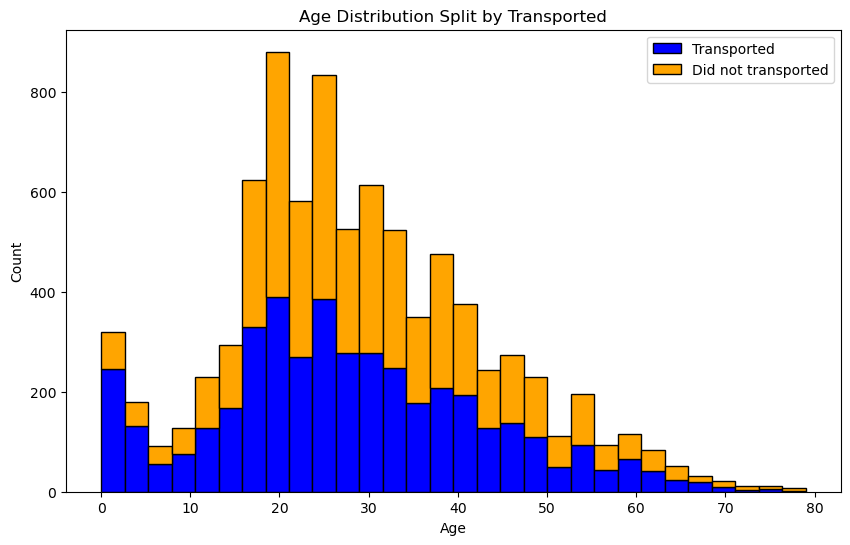

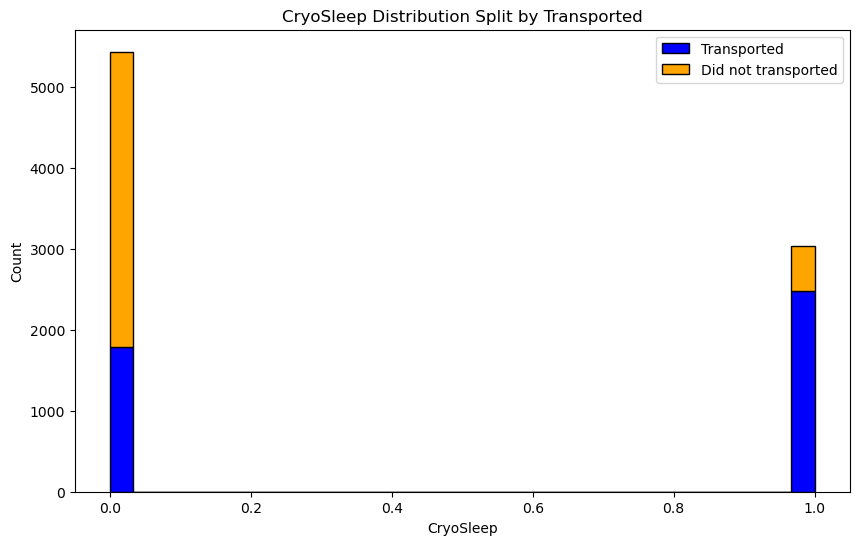

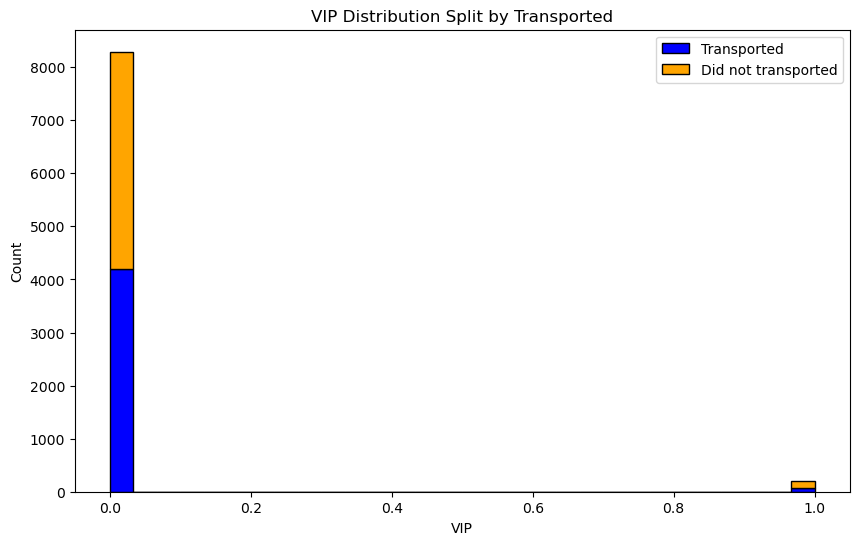

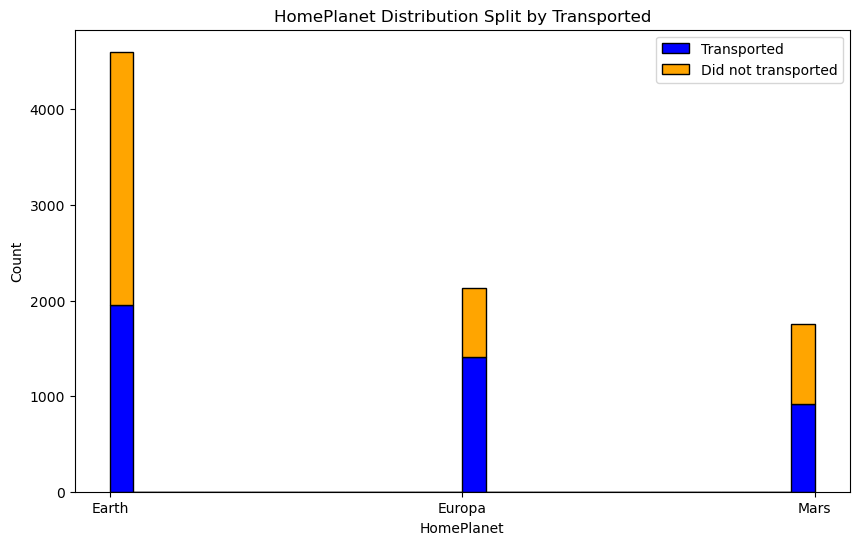

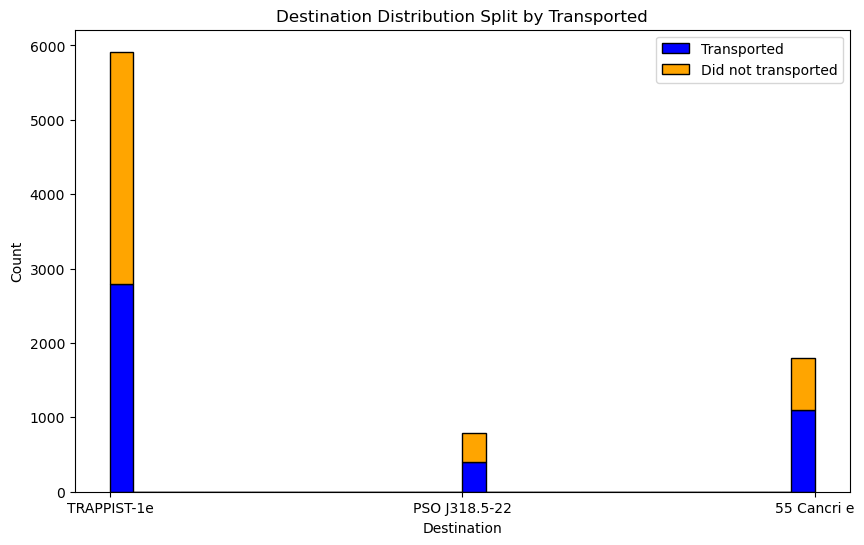

In [5]:
feature_names = list(train_df.columns)
print(feature_names)
for name in ["Age", "CryoSleep", "VIP", "HomePlanet", "Destination"]:
    distrib_split_by_transported(train_df, name)

### New feature: TotBill = RoomService + FoodCourt + ShoppingMall + Spa + VRDeck

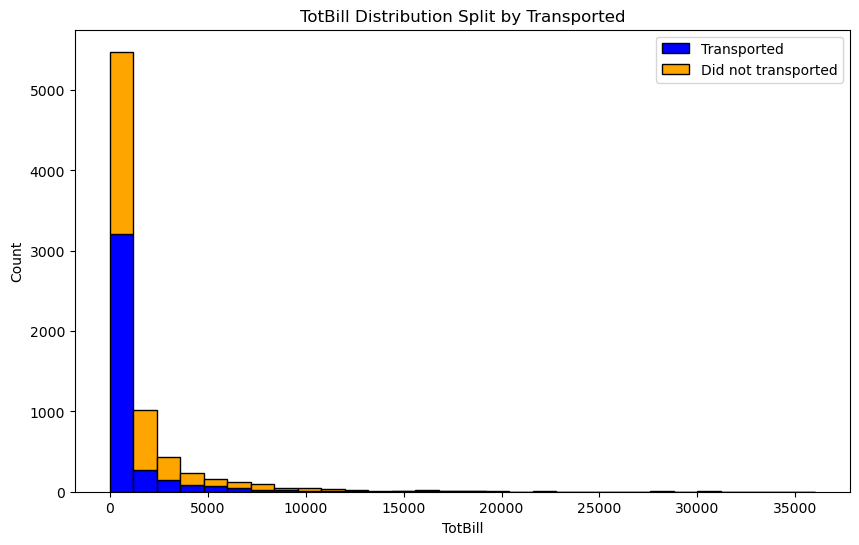

In [6]:
# Create a new column that contains the sum of the bills.
train_df["TotBill"] = train_df["RoomService"] + train_df["FoodCourt"] + train_df["ShoppingMall"] + train_df["Spa"] + train_df["VRDeck"]
distrib_split_by_transported(train_df, "TotBill")

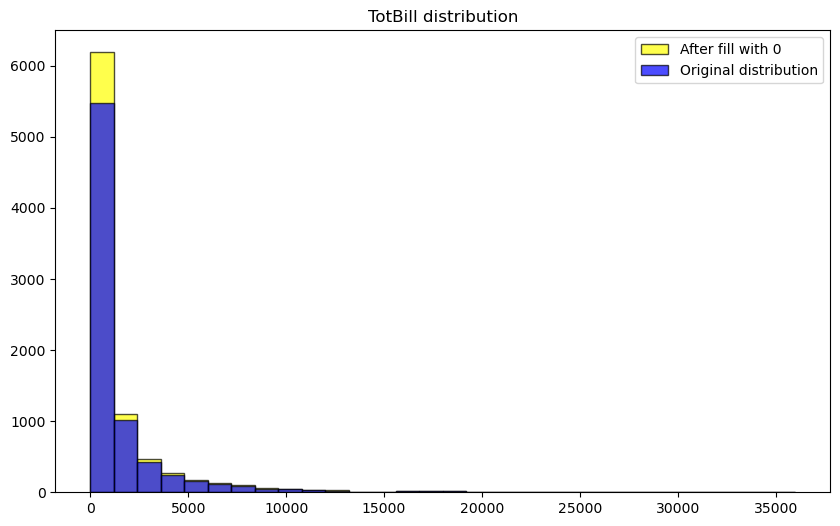

In [7]:
# Let's see how the distribution changes if we fill with 0's the missing data.
zero_fillna = (
    train_df["RoomService"].fillna(0) + 
    train_df["FoodCourt"].fillna(0) + 
    train_df["ShoppingMall"].fillna(0) + 
    train_df["Spa"].fillna(0) + 
    train_df["VRDeck"].fillna(0)
)

plt.figure(figsize=(10, 6))
plt.hist(zero_fillna.to_list(), bins=30, color='yellow', alpha=0.7, edgecolor='black', label="After fill with 0")
plt.hist(train_df["TotBill"].to_list(), bins=30, color='blue', alpha=0.7, edgecolor='black', label="Original distribution")
plt.title("TotBill distribution")
plt.legend()
plt.show()

In [8]:
# Let's replace the TotBill column with the zero_fillna.

# Train dataframe.
train_df["TotBill"] = zero_fillna

# Test dataframe.
test_df["TotBill"] = (
    test_df["RoomService"].fillna(0) + 
    test_df["FoodCourt"].fillna(0) + 
    test_df["ShoppingMall"].fillna(0) + 
    test_df["Spa"].fillna(0) + 
    test_df["VRDeck"].fillna(0)
)

# Drop the other columns.
train_df = train_df.drop(columns=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1)
test_df = test_df.drop(columns=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1)

### Categorize TotBill feature

TotBill
Low          3758
Mid          2819
High         1479
Very high     637
Name: count, dtype: int64


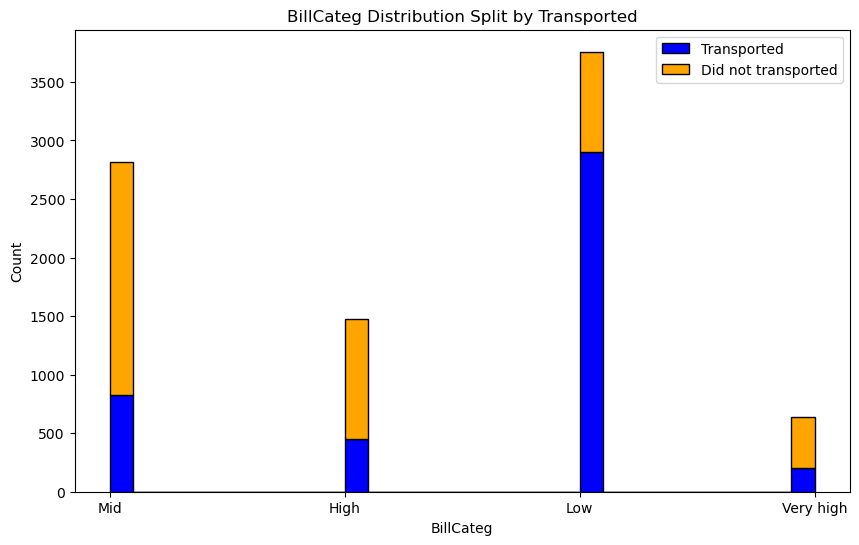

In [9]:
def categ_totbill(totbill):
    if totbill <= 500:
        return "Low"
    elif totbill <= 1500:
        return "Mid"
    elif totbill <= 5000:
        return "High"
    else:
        return "Very high"

# Train dataframe.
status_col = train_df["TotBill"].apply(categ_totbill)
print(status_col.value_counts())
train_df["BillCateg"] = status_col
distrib_split_by_transported(train_df, "BillCateg")

# Test dataframe.
test_df["BillCateg"] = test_df["TotBill"].apply(categ_totbill)

# Drop the TotBill column.
train_df = train_df.drop(columns="TotBill", axis=1)
test_df = test_df.drop(columns="TotBill", axis=1)

### New feature: Group

Extract the Group from the PassengerId column.

In [10]:
def get_group(Id):
    Id = Id.split("_")
    return Id[0]

group_col = train_df["PassengerId"].apply(get_group)
print(group_col.value_counts())

PassengerId
4256    8
5133    8
8956    8
8168    8
0984    8
       ..
3469    1
3468    1
3467    1
3465    1
3491    1
Name: count, Length: 6217, dtype: int64
